In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()

age_mean, age_median

(np.float64(29.69911764705882), np.float64(28.0))

In [3]:
df['Age'] = df['Age'].fillna(age_median)
df['Age'].isnull().sum()

np.int64(0)

In [5]:
embarked_mode = df['Embarked'].mode()[0]
embarked_mode

df['Embarked'] = df['Embarked'].fillna(embarked_mode)
df['Embarked'].isnull().sum()

np.int64(0)

In [6]:
missing_cabin_percent = df['Cabin'].isnull().mean() * 100
missing_cabin_percent

np.float64(77.10437710437711)

Why not fill the Cabin column?

The Cabin column has a very high percentage of missing values.
Because of this, any attempt to fill or guess the missing cabins would add noise and reduce quality.
It is better to drop the column completely.

In [7]:
df = df.drop('Cabin', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


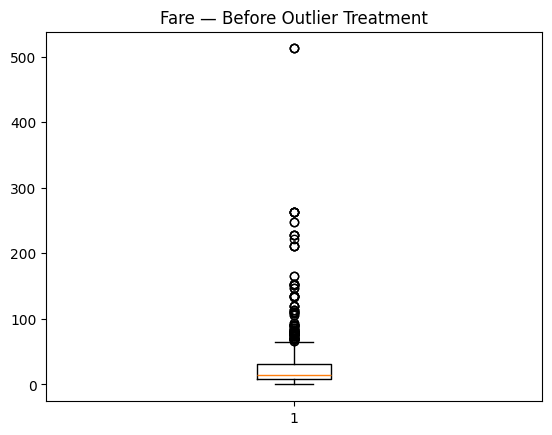

In [8]:
#Exercise 2- Outliers — Fare

plt.boxplot(df['Fare'])
plt.title("Fare — Before Outlier Treatment")
plt.show()

In [9]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, upper_bound

(np.float64(7.9104),
 np.float64(31.0),
 np.float64(23.0896),
 np.float64(65.6344))

In [10]:
df.loc[df['Fare'] > upper_bound, 'Fare'] = upper_bound

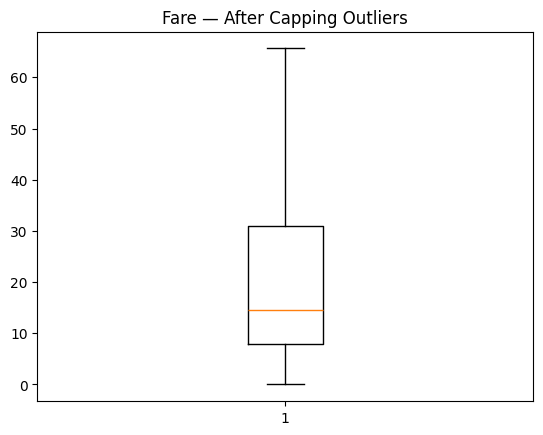

In [11]:
plt.boxplot(df['Fare'])
plt.title("Fare — After Capping Outliers")
plt.show()

Cleaning the "Country" column
If the dataset contains categories such as:

'USA','United States','U.S.A','America','Canada','Germany'

Steps to clean the column:
1.Convert all values to lowercase with .str.lower().
2.Use .replace() or .map() to merge similar categories:"usa", "united states", "u.s.a", "america" → "united states"
3.emove extra spaces using .str.strip().
4.Check results with .value_counts().

Final categories:
"united states"
"canada"
"germany"